In [195]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.lines as mlines

### Hỗn hợp

In [196]:
honhop_folder = "data2/Honhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
honhop = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop.columns = ['_'.join(map(str, col)) for col in honhop.columns]
honhop["File name"] = file_names
honhop["Type"] = honhop["File name"].str.split("-", expand=True)[0].str[0]

### Rễ

In [197]:
re_folder = "data2/Re"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(re_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(re_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
re = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
re.columns = ['_'.join(map(str, col)) for col in re.columns]
re["File name"] = file_names
re["Type"] = re["File name"].str.split("-", expand=True)[0].str[0]

### Thân

In [198]:
than_folder = "data2/Than"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(than_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(than_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
than = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
than.columns = ['_'.join(map(str, col)) for col in than.columns]
than["File name"] = file_names
than["Type"] = than["File name"].str.split("-", expand=True)[0].str[0]

In [199]:
honhop_folder = "data2/testHonhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
honhop_test = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop_test.columns = ['_'.join(map(str, col)) for col in honhop_test.columns]
honhop_test["File name"] = file_names
honhop_test["Type"] = honhop_test["File name"].str.split("-", expand=True)[0].str[0]

In [200]:
data = pd.concat([honhop, re, than, honhop_test], axis=0)

In [201]:
# data["Type"].loc[data["Type"] == 'D'] = "R"

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Type"])

In [203]:
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [204]:
X_snv = snv(data.iloc[:, :-2].values)
X_deriv = savgol_filter(X_snv, window_length = 25,  polyorder=5, deriv = 1)

In [205]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_deriv)

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(scaled_data, y)

In [206]:
le.classes_

array(['D', 'R', 'T'], dtype=object)

In [207]:
import plotly.graph_objects as go


# Create a scatter plot
fig = go.Figure()
hover_text = data["File name"].values
color_map = {
    0: 'orange',
    1: 'blue',
    2: 'red'
}
# Add scatter trace
fig.add_trace(go.Scatter(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    mode='markers',  # Display markers and text
    marker=dict(
        size=10, 
        color = y,
        colorscale='Viridis', 
        colorbar=dict(title='Type', tickvals = [0,1,2], ticktext = ['Hỗn hợp', 'Rễ', 'Thân']),  
        showscale=True,
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    hovertemplate = hover_text,

))

# Update layout
fig.update_layout(
    title='2D Scatter Plot Example',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    width = 600,
    height = 600,
)

# Show the plot
fig.show()

In [208]:
test_folder = "data2/Test"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(test_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(test_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
test = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
test.columns = ['_'.join(map(str, col)) for col in test.columns]
test["File name"] = file_names
test["Type"] = test["File name"].str.split("-", expand=True)[0].str[0]

In [209]:
X_test = test.iloc[:, :-2]
X_test_snv = snv(X_test.values)
X_test_deriv = savgol_filter(X_test_snv, window_length = 25,  polyorder=5, deriv = 1)

In [210]:
X_test_scaled = scaler.transform(X_test_deriv)
X_test_lda = lda.transform(X_test_scaled)

In [211]:
lda.predict(X_test_scaled)

array([2, 1, 0, 0, 2, 0, 0, 2, 2])

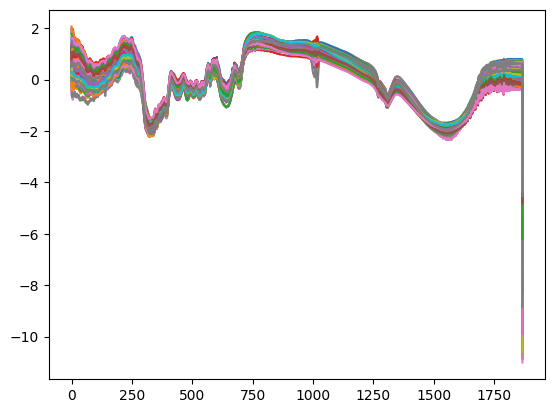

In [212]:
plt.plot(X_test_snv.T)
plt.plot(X_snv.T)
plt.show()

In [213]:
import plotly.graph_objects as go


# Create a scatter plot
fig = go.Figure()
hover_text1 = data["File name"].values
hover_text2 = test["File name"].values
color_map = {
    0: 'orange',
    1: 'blue',
    2: 'red'
}
# Add scatter trace
fig.add_trace(go.Scatter(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    mode='markers',  # Display markers and text
    marker=dict(
        size=10, 
        color = y,
        colorscale='Viridis', 
        colorbar=dict(title='Type', tickvals = [0,1,2], ticktext = ['Hỗn hợp', 'Rễ', 'Thân']),  
        showscale=True,
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    hovertemplate = hover_text1,

))
fig.add_trace(go.Scatter(
    x=X_test_lda[:, 0],
    y=X_test_lda[:, 1],
    mode='markers',  # Display markers and text
    marker=dict(
        size=10, 
        color = 'green',
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    hovertemplate = hover_text2,

))

# Update layout
fig.update_layout(
    title='2D Scatter Plot Example',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    width = 600,
    height = 600,
)

# Show the plot
fig.show()